### Técnicas de Aprendizado Não-Supervisionado - PCA e Clustering

In [6]:
from sklearn.datasets import load_iris
import pandas as pd

# Carregar os dados
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target # Apenas para comparação futura

# Exibir informações básicas
print(X.head())
print("Número de amostras:", X.shape[0])
print("Número de características:", X.shape[1])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Número de amostras: 150
Número de características: 4


#### UMAP

In [ ]:
import umap

reducer = umap.UMAP(n_components=2)
X_umap = reducer.fit_transform(X)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1])
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Redução de Dimensionalidade com UMAP")
plt.show()

#### PCA (Principal Component Analysis)

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduza os dados para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

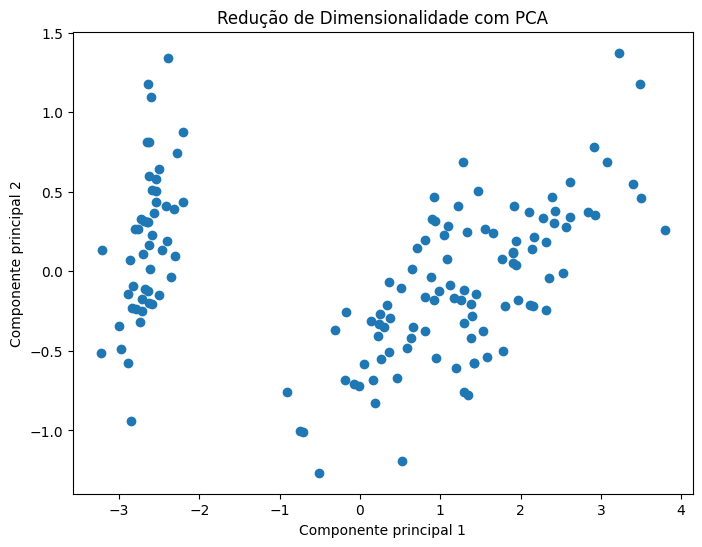

In [7]:
# Plotar em 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("Redução de Dimensionalidade com PCA")
plt.show()

#### K-Means Clustering

In [8]:
from sklearn.cluster import KMeans

# Inicialize o modelo
kmeans = KMeans(n_clusters=3, random_state=42)
model = kmeans.fit(X_pca)

In [9]:
model.cluster_centers_

array([[ 2.34652659,  0.27393856],
       [-2.64241546,  0.19088505],
       [ 0.66567601, -0.3316042 ]])

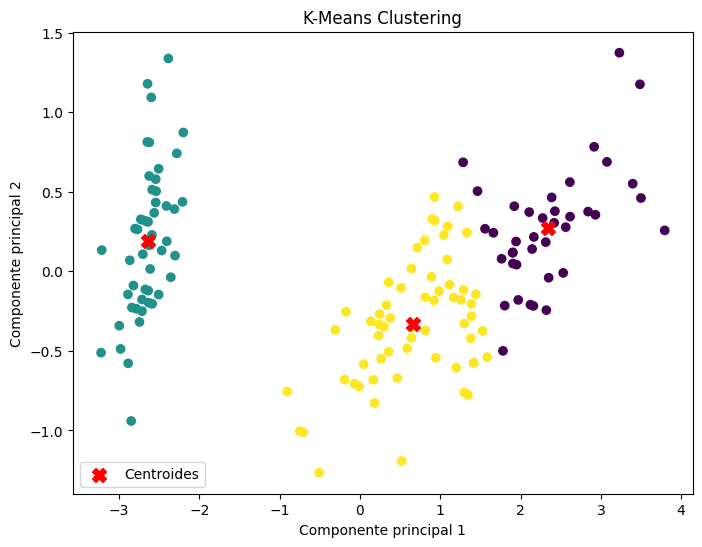

In [10]:
# Plotar novamente com os rótulos dos dados e centróides do K-means
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="X", c="red", s=100, label="Centroides")
plt.legend()
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("K-Means Clustering")
plt.show()

#### Dendograma

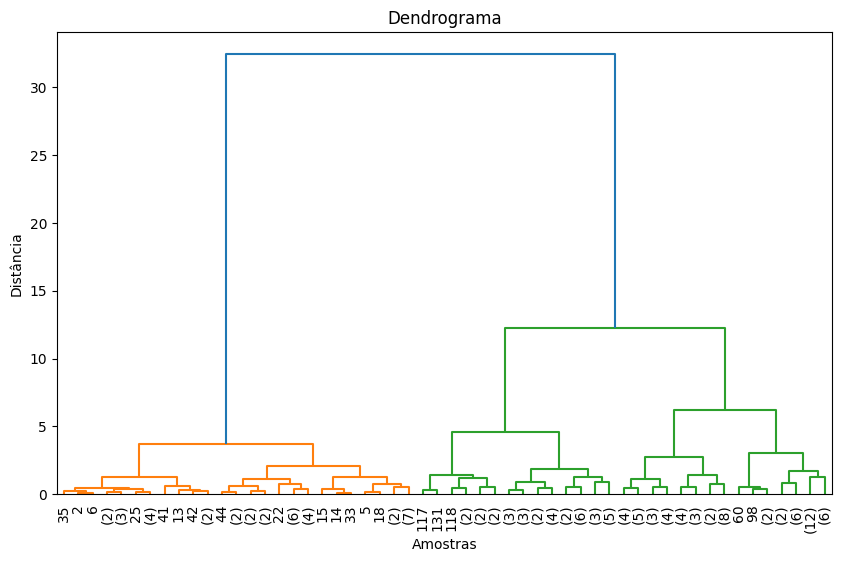

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Crie a matriz de ligação (Hierarchical Clustering)
linkage_matrix = linkage(X_pca, method='ward')

# Gere o dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5, leaf_font_size=10)
plt.title('Dendrograma')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

Pelo dendograma acima identificamos, principalmente, 2 clusters principais (laranja e verde).

Vamos selecionar 3 clusters para compararmos com o PCA, fazendo o corte em uma distância de, aproximadamente, 10 de acordo com o dendograma.

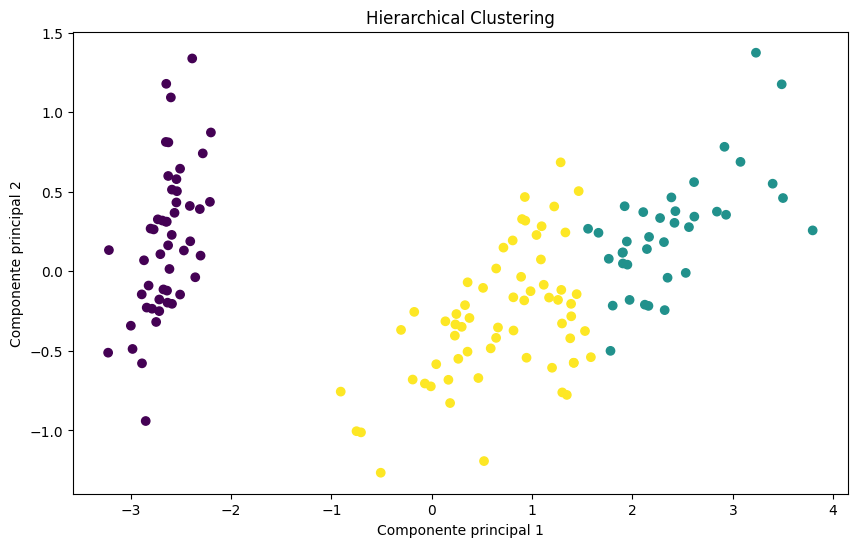

In [13]:
# Cut off to define 3 clusters
cut_off_distance = 10

hierarchical_labels = fcluster(linkage_matrix, cut_off_distance, criterion='distance')

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering")
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')

plt.show()

#### Comparação entre os métodos

Compare os agrupamentos gerados (K-Médias e Hierárquico) com os rótulos
verdadeiros utilizando o Índice Randômico Ajustado (ARI).

In [48]:
from sklearn.metrics import adjusted_rand_score

# Calcule o ARI para K-Médias
ari_kmeans = adjusted_rand_score(y, model.labels_)

# Calcule o ARI para Agrupamento Hierárquico
ari_hierarchical = adjusted_rand_score(y, hierarchical_labels)

In [49]:
print("Adjusted Rand Score - K-Means:", ari_kmeans)
print("Adjusted Rand Score - Agrupamento Hierárquico:", ari_hierarchical)

Adjusted Rand Score - K-Means: 0.7163421126838476
Adjusted Rand Score - Agrupamento Hierárquico: 0.7445264308738749


Vemos que o Agrupamento Hierárquico se aproximou mais dos valores reais do que o K-Means.

Inicialmente, temos as principais características dos dois:
- O clustering hierárquico é um método que busca construir uma hierarquia de clusters. Essa técnica começa tratando cada ponto de dados como um único cluster e, em seguida, mescla iterativamente os pares mais próximos de clusters até que todos os pontos sejam mesclados em um único cluster abrangente ou até que uma estrutura desejada seja alcançada. É isso que, basicamente, mostra o nosso Dendograma, sendo muito útil quando não conhecemos a estrutura dos dados de antemão e a quantidade de clusters.

- O agrupamento K-means, por outro lado, particiona os dados em K subgrupos distintos, onde cada ponto de dados pertence ao subgrupo (cluster) com a média mais próxima. O processo envolve inicializar aleatoriamente centroides K, atribuir pontos ao centroide mais próximo, recalcular centroides e repetir essas etapas até a convergência.

Portanto, vemos que a clusterização hierárquica captura melhor a estrutura dos nossos dados e nos permite uma análise mais abrangente, contribuindo também para que sua taxa de ARI, no trabalho, seja maior para essa técnica.